## Predicting online new popularity
### Final Project
#### By Ridhima Puri

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
from urllib.request import urlopen
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pylab as plt
%matplotlib inline 
plt.rc("font",size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
data = pd.read_csv("modified.csv")

C:\Users\ridhi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### The columns in the data contains spaces, so I have used strip function to remove the same

In [3]:
data.rename(columns=lambda x: x.strip())

,Unnamed: 0,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,title,shares
0,0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,Amazon's Streaming Video Library Now a Little ...,593
1,1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,AP's Twitter to Begin Displaying Sponsored Tweets,711
2,2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,Apple's App Store Passes 40 Billion Downloads,1500
3,3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,This Astronaut Is Rooting for Notre Dame Tonight,1200
4,4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,New U-Verse Apps Simplify Sharing Photos and V...,505
5,5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.559889,1.0,0.698198,2,2,0,0,4.359459,9,0,0,0,0,1,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,8500.0,8500.0,8500.000000,1,0,0,0,0,0,0,0,0.022245,0.306718,0.022231,0.022224,0.626582,0.437409,0.071184,0.029730,0.027027,0.523810,0.476190,0.350610,0.136364,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,BeeWi's Smart Toys Put Your Smartphone in Control,855
6,6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,0.418163,1.0,0.549834,21,20,20,0,4.654167,10,1,0,0,0,0,0,0,0.00,0.000000,0,0,0.000000,0.000000,0.000000,0.000000,54

In [4]:
del data['Unnamed: 0']

In [5]:
data = data.rename(columns=lambda x: x.strip())
#list(data)

In [6]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448565,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

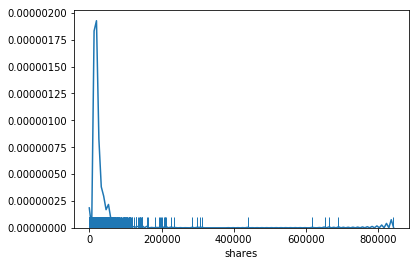

In [7]:
sns.distplot(data['shares'], hist=False, rug=True);

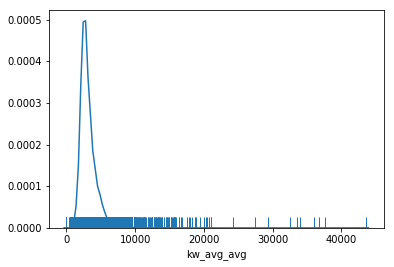

In [8]:
sns.distplot(data['kw_avg_avg'], hist=False, rug=True);

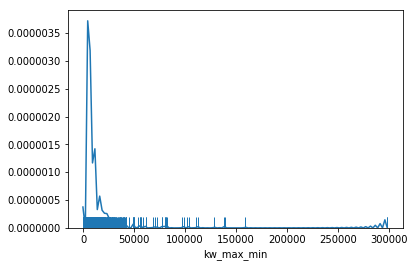

In [9]:
sns.distplot(data['kw_max_min'], hist=False, rug=True);

#### The above graphs show that the data in the respective columns is skewed towards the left.

In [10]:
numeric = [c for i,c in enumerate(data.columns) if data.dtypes[i] in [np.float64, np.int64]]
len(numeric)


60

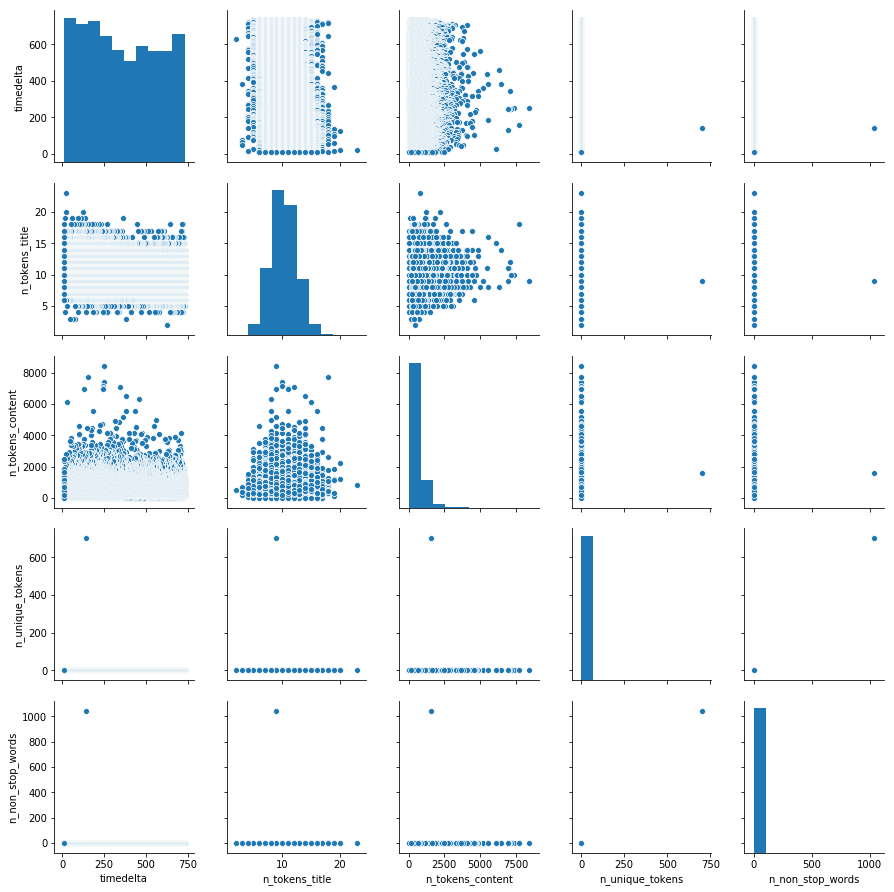

In [11]:
sns.pairplot(data[numeric[:5]]);

In [12]:
data[data.n_unique_tokens > 100]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,title,shares
31037,http://mashable.com/2014/08/18/ukraine-civilia...,142,9,1570,701.0,1042.0,650.0,11,10,51,0,4.696178,7,0,1,0,0,0,0,-1,778.0,143.714286,23100,843300,330442.8571,2420.579189,3490.598812,2912.105124,795.0,0.0,6924.375,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,5900


#### My data has an outlier which we can se from the above graphs

In [13]:
data_clean = data[data.n_unique_tokens < 100].copy()

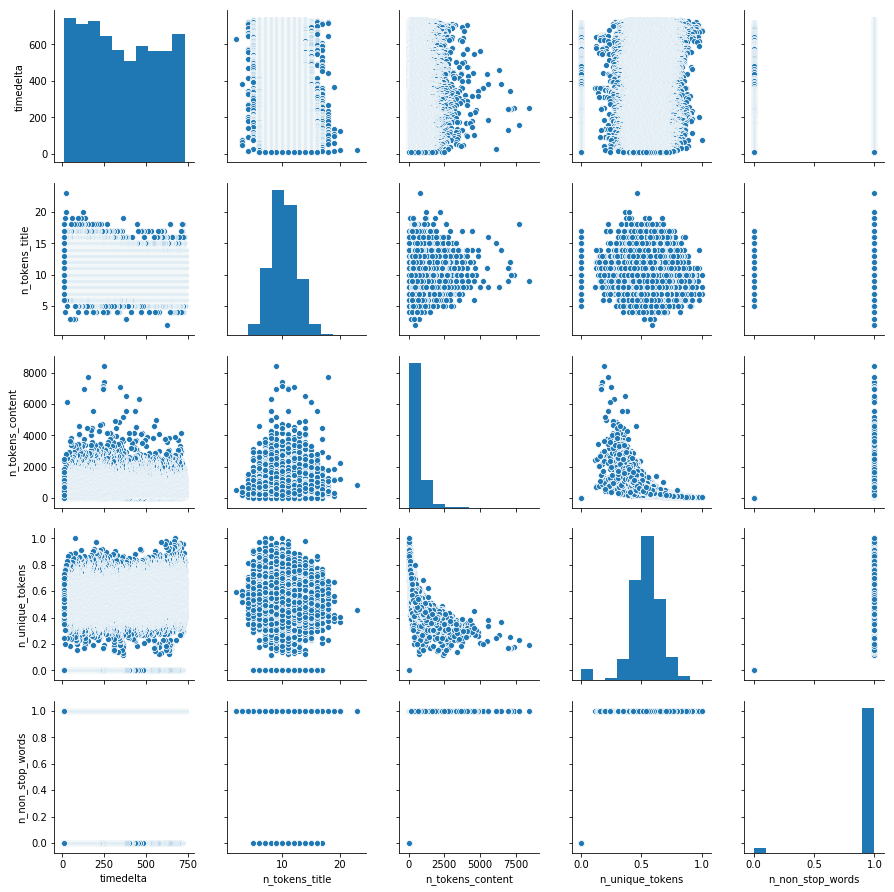

In [14]:
sns.pairplot(data_clean[numeric[:5]]);

### we can see that the variables have some scaling issues which needs to be tackled

In [15]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["scale"] = ""
desc.loc[desc["log"],"scale"] = "log"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


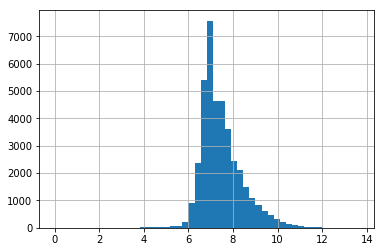

In [16]:
np.log(data_clean["shares"]).hist(bins=50);

#### The log distribution is better when compared to the previous one and is close to normal form

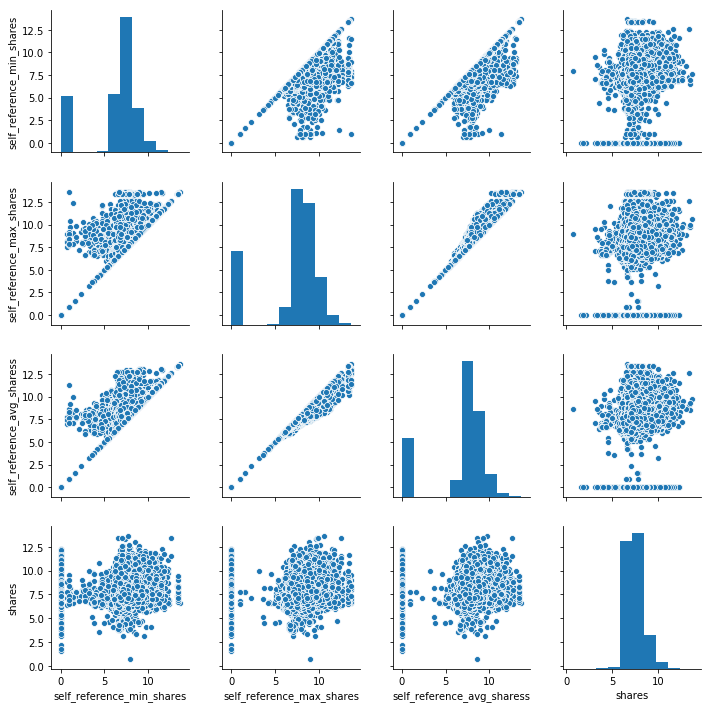

In [17]:
shares = data_clean[[c for c in numeric if "share" in c]].copy()
for c in shares.columns:
    shares[c] = np.log(shares[c] + 1)
sns.pairplot(shares);

In [18]:
desc = data_clean.describe().T
desc["log"] = (desc["max"] > desc["50%"] * 9) & (desc["max"] > 1)
desc["log+2"] = desc["log"] & (desc["min"] < 0)
desc["scale"] = ""
desc.loc[desc["log"],"scale"] = "log"
desc.loc[desc["log+2"],"scale"] = "log+2"
desc[["mean", "min", "50%", "max", "scale"]]

,mean,min,50%,max,scale
timedelta,354.535832,8.000000,339.000000,731.000000,
n_tokens_title,10.398784,2.000000,10.000000,23.000000,
n_tokens_content,546.488914,0.000000,409.000000,8474.000000,log
n_unique_tokens,0.530547,0.000000,0.539216,1.000000,
n_non_stop_words,0.970209,0.000000,1.000000,1.000000,
n_non_stop_unique_tokens,0.672796,0.000000,0.690476,1.000000,
num_hrefs,10.883687,0.000000,8.000000,304.000000,log
num_self_hrefs,3.293469,0.000000,3.000000,116.000000,log
num_imgs,4.542971,0.000000,1.000000,128.000000,log
num_videos,1.249905,0.000000,0.000000,91.000000,log


#### The scaling issues in the data has been resolved using the log transformation and this new data will be fed into the algorithms.

In [19]:
new_data = data_clean.copy()
for c in desc.index [ desc["scale"] == "log"]:
    new_data[c] = np.log(new_data[c] + 1)
for c in desc.index [ desc["scale"] == "log+2"]:
    new_data[c] = np.log(new_data[c] + 2)

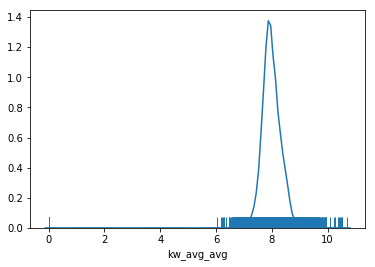

In [20]:
sns.distplot(new_data['kw_avg_avg'], hist=False, rug=True);

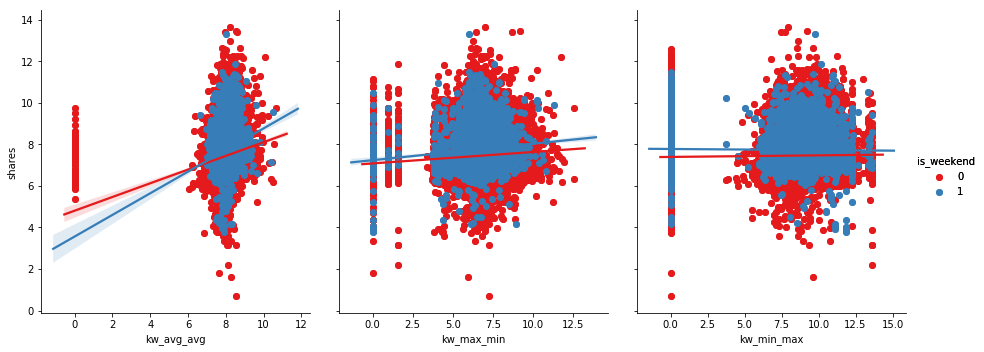

In [21]:
g = sns.pairplot(new_data, x_vars=["kw_avg_avg", "kw_max_min", "kw_min_max"],
                 y_vars=["shares"], hue= "is_weekend", palette="Set1", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

### This shows that the ‘kw_avg_avg’ variable is having a positive effect on our outcome variable which means that popularity results in significantly higher average, maximum and minimum shares of the average keyword than unpopularity

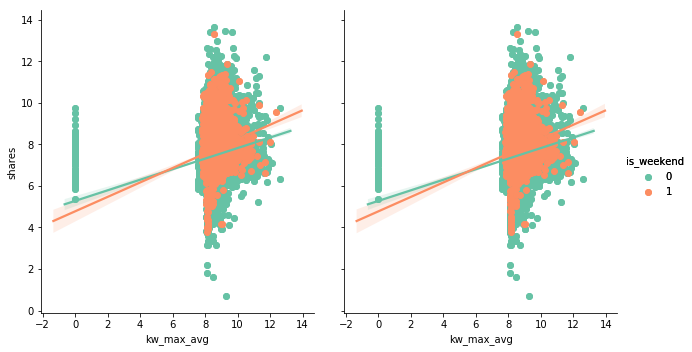

In [22]:
g = sns.pairplot(new_data, x_vars=["kw_max_avg", "kw_max_avg"],
                 y_vars=["shares"], hue= "is_weekend", palette="Set2", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

C:\Users\ridhi\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000026CBE3DEC50> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


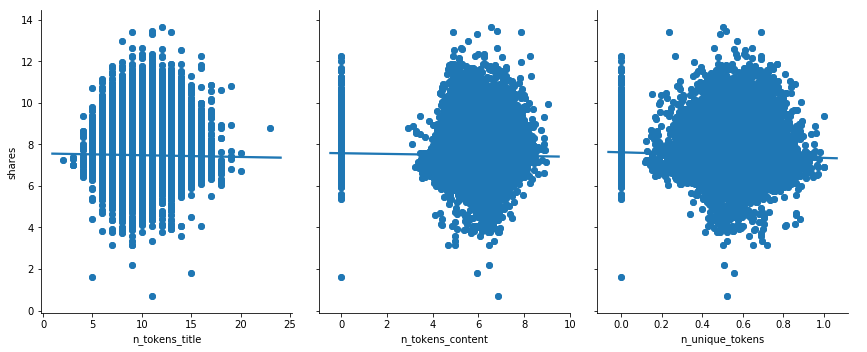

In [23]:
g = sns.pairplot(new_data, x_vars=["n_tokens_title", "n_tokens_content", "n_unique_tokens"],
                 y_vars=["shares"], palette="Set2", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

### The number of words in the title or the content may not be that significant to determine the popularity of an article.

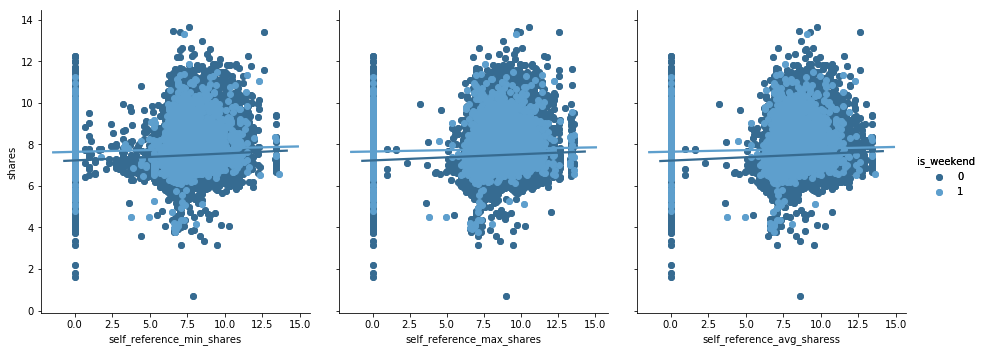

In [24]:
g = sns.pairplot(new_data, x_vars=["self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess"],
                 y_vars=["shares"], hue= "is_weekend", palette="Blues_d", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

###  If there are more shares of the reference’s articles used in the content, the more is the share of the current article on weekends as compared to weekdays.

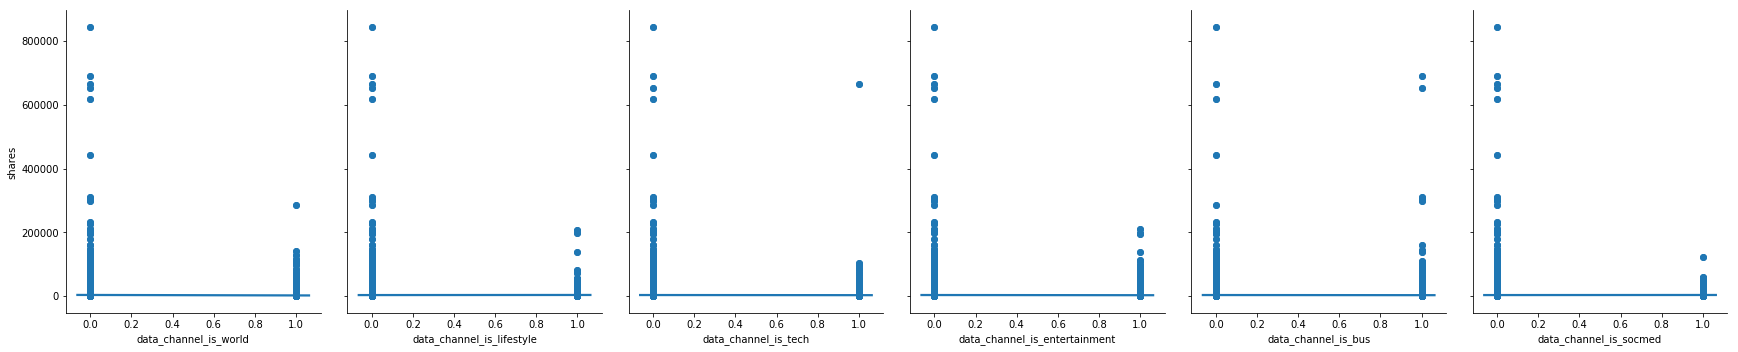

In [25]:
g = sns.pairplot(data, x_vars=["data_channel_is_world", "data_channel_is_lifestyle", "data_channel_is_tech", "data_channel_is_entertainment",
                          "data_channel_is_bus", "data_channel_is_socmed"], y_vars=["shares"], palette="Set2", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)

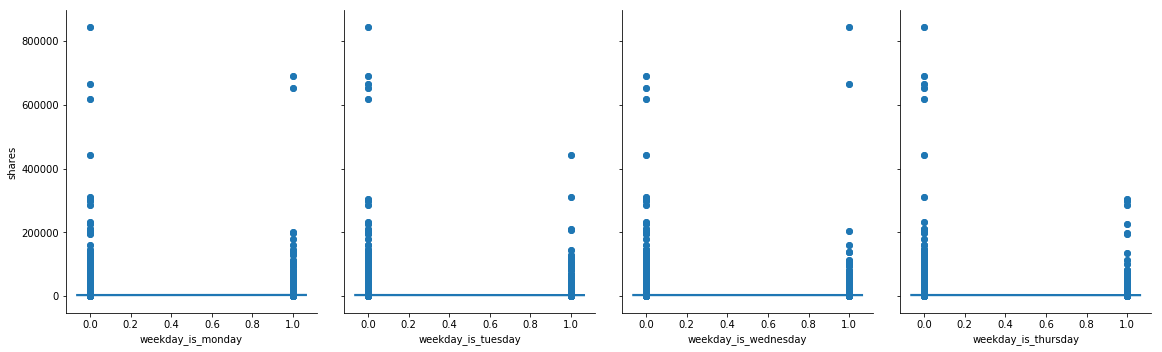

In [26]:
g = sns.pairplot(data, x_vars=["weekday_is_monday", "weekday_is_tuesday", "weekday_is_wednesday", "weekday_is_thursday"
                              ], y_vars=["shares"], height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)

### This typically means that publishing an article on different weekdays does not have any significant impact on its popularity nor what category does that article belongs has any significant affect 

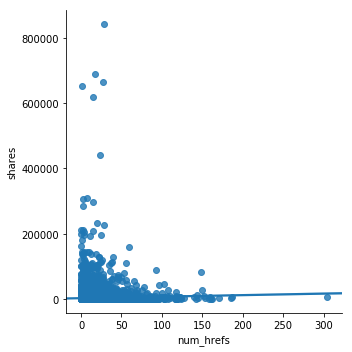

In [27]:
sns.lmplot(x="num_hrefs", y="shares", data=data);

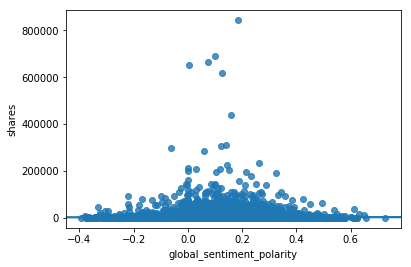

In [28]:
sns.regplot(x="global_sentiment_polarity", y="shares", data=data);

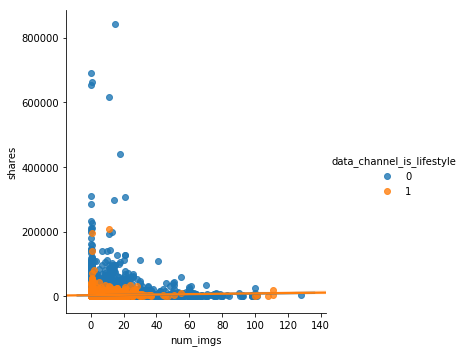

In [29]:
sns.lmplot(x="num_imgs", y="shares", hue="data_channel_is_lifestyle", data=data);

In [30]:
x = data.loc[data['title'].isnull() == False, 'title']

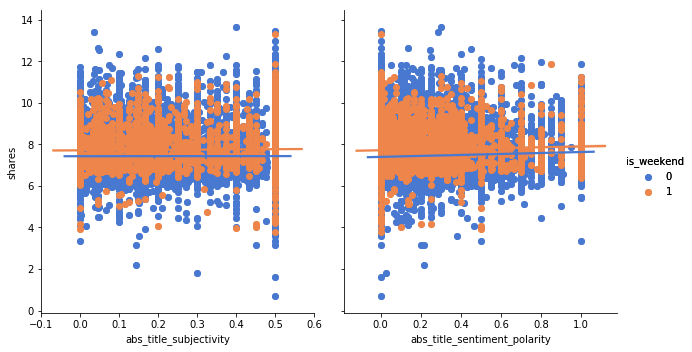

In [31]:
g = sns.pairplot(new_data, x_vars=["abs_title_subjectivity", "abs_title_sentiment_polarity"],
                 y_vars=["shares"], hue= "is_weekend", palette="muted", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

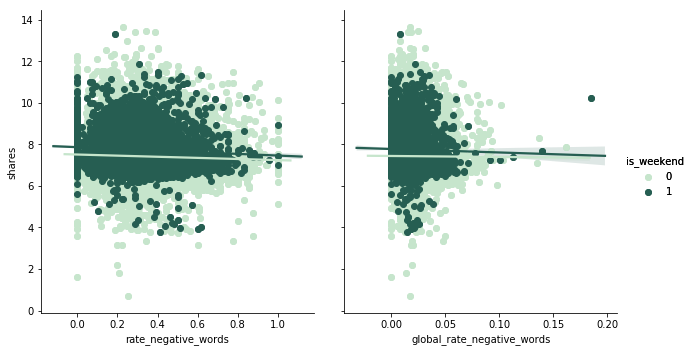

In [32]:
g = sns.pairplot(new_data, x_vars=["rate_negative_words", "global_rate_negative_words"],
                 y_vars=["shares"], hue= "is_weekend", palette="ch:2.5,-.2,dark=.3", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

### The negative words in content are leading to less shares of content.

In [33]:
list(data)

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

C:\Users\ridhi\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000026CB9DA8BA8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


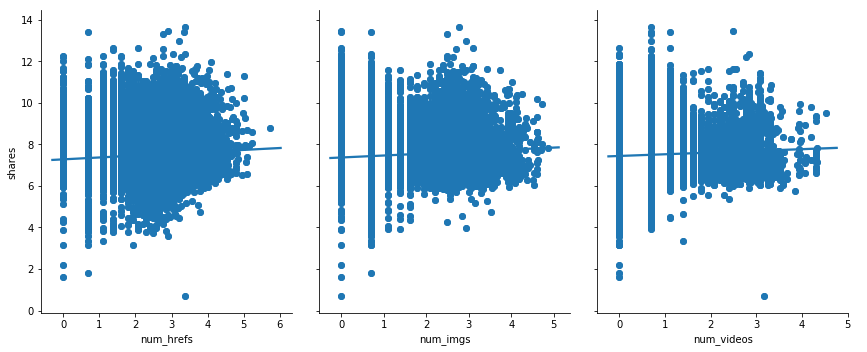

In [34]:
g = sns.pairplot(new_data, x_vars=["num_hrefs", "num_imgs", "num_videos"],
                 y_vars=["shares"], palette="husl", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

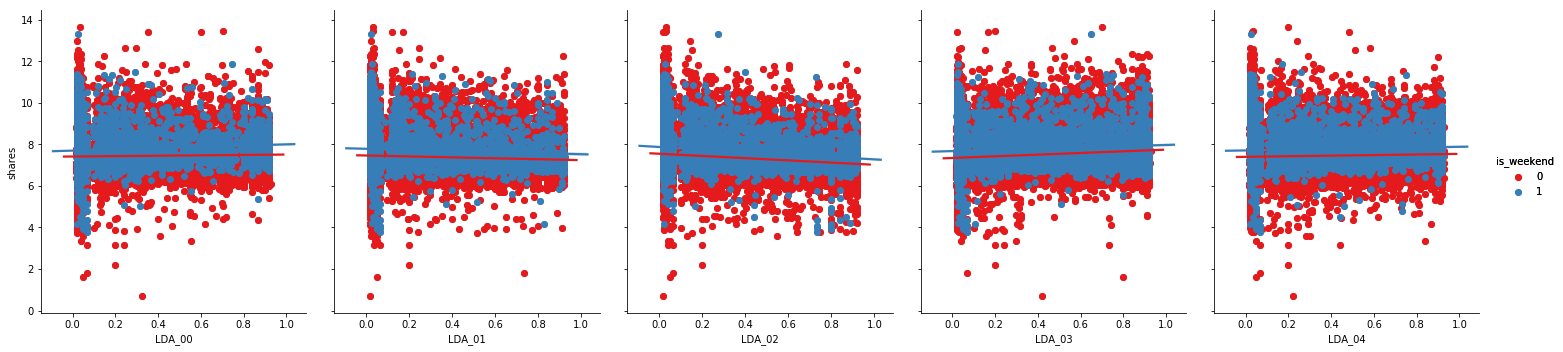

In [35]:
g = sns.pairplot(new_data, x_vars=["LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04"],
                 y_vars=["shares"], hue= "is_weekend", palette="Set1", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

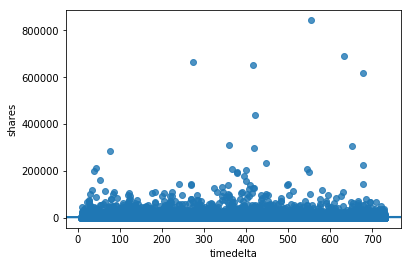

In [36]:
sns.regplot(x="timedelta", y="shares", data=data);

### Below is the word cloud of about 5000 articles. The query for scraping and parsing took 2 hours to get this information and many sites were giving 500 bad gateway error.


In [37]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

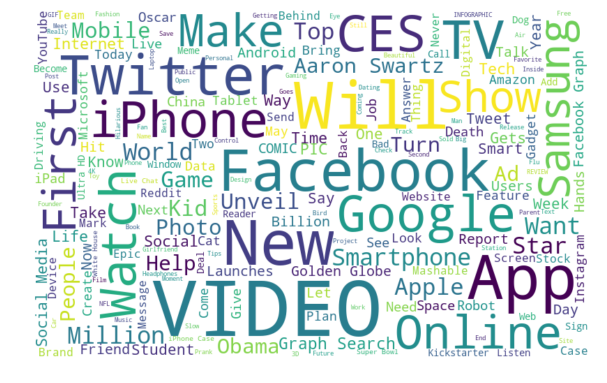

In [38]:
all_words = ' '.join([text for text in x])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

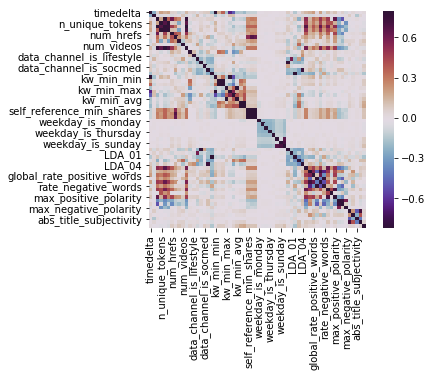

In [39]:
corrMat= new_data.corr()
sns.heatmap(corrMat, vmax = .8, square = True, cmap="twilight_shifted") 

In [40]:
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
#This function draws decision trees using the pydotplus and graphviz libraries
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pplus.graph_from_dot_data(dot_data.getvalue())
    return(graph)

In [41]:
x = data_clean.loc[:,'timedelta':'abs_title_sentiment_polarity']
y = data_clean.loc[:,'shares']

### Random forest for Regression

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y)

In [43]:
from sklearn.ensemble import RandomForestRegressor
clr = RandomForestRegressor(min_samples_leaf=20, n_estimators=50, min_weight_fraction_leaf=0.01, min_samples_split=10)
clr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=20, min_samples_split=10,
           min_weight_fraction_leaf=0.01, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [44]:
y_pred = clr.predict(X_test)
from sklearn import model_selection

In [45]:
kfold = model_selection.KFold(n_splits=10, random_state=42)
scoring = 'neg_mean_squared_error'
results = model_selection.cross_val_score(clr, X_test, y_test, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-69983395.45344177 48679330.85759609


In [46]:
kfold = model_selection.KFold(n_splits=10, random_state=42)
scoring = 'r2'
results = model_selection.cross_val_score(clr, X_test, y_test, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

0.03277797191146107 0.020623102694294074


### Linear Regression

In [47]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train) # Creates an OLS estimator
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     12.08
Date:                Tue, 23 Apr 2019   Prob (F-statistic):          5.44e-106
Time:                        22:30:00   Log-Likelihood:            -3.2233e+05
No. Observations:               29732   AIC:                         6.448e+05
Df Residuals:                   29675   BIC:                         6.452e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
timedelta     

### The model performance is very low. This can be due to multicollinearity. 
#### I have used the eliminating features method for selecting the signifcant variables for my model. This is built in function in sklearn feature selection module.

###  Selecting variables in Linear Regression

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
# load data
model = LinearRegression()
rfe = RFE(model, 10)
fit = rfe.fit(x, y)

In [49]:
print(fit.ranking_)

[37 31 39 11  1 10 34 33 35 36 23 30  9  4  5  7  8  6 40 44 43 48 49 50
 41 42 38 45 47 46 27 18 20 17 19 28 25 26  1  1  1  1  1  1 12  1 22  2
  3 13  1 14  1 21 29 32 24 16 15]


In [50]:
features_Linear = x[x.columns.values[fit.ranking_==1]]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [52]:
results = model.fit(X_train,y_train)

In [53]:
y_hat = model.predict(X_test)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print ("Coefficients:", model.coef_)
print ("Intercept:", model.intercept_)
print ("MSE:", mean_squared_error(y_hat, y_test))
print ("R^2:", r2_score(y_hat, y_test))

Coefficients: [ 1.66394970e+00  1.15055999e+02  6.31277608e-01  3.20480510e+03
 -1.86123095e+03 -1.26695931e+03  3.09914923e+01 -6.30900966e+01
  5.89255990e+00 -2.46887308e+00 -5.57411908e+02  6.81745319e+01
 -1.00550296e+03 -1.13979586e+03 -9.18384185e+02 -5.83478878e+02
 -4.53248154e+02 -3.23155396e+02  8.85805613e-01  1.24308268e-01
 -4.81334137e-01 -2.83879980e-03 -2.57239262e-04  3.03929138e-04
 -3.35366630e-01 -2.12820922e-01  1.64426205e+00  3.14255611e-02
  7.81498627e-03 -1.13366207e-02  4.94879802e+05  4.94317714e+05
  4.94512605e+05  4.94312017e+05  4.94373365e+05 -1.10973653e+06
 -1.11012739e+06  1.60471702e+06  1.16096396e+11  1.16096395e+11
  1.16096394e+11  1.16096395e+11  1.16096395e+11  2.55994973e+03
  7.60338831e+02 -1.41717468e+04  2.72714062e+03  2.18995232e+03
  2.06654425e+03 -1.57223899e+03 -2.01555158e+03  2.87686629e+02
 -2.14843711e+03  1.94690743e+02 -2.01502011e+02 -7.05827607e+01
  1.02462024e+02  6.58206093e+02  6.24057745e+02]
Intercept: -116096891525.3

### This problem of predicting popularity using regression was not giving any significant results as the predictive power of the model is very low.
#### Let us try a different approach by turning our problem into a classification problem as our model is not performing well with this approach

In [54]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [55]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,7.223767,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,3998.755396,10329.212662,6401.697580,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,1.909130,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,19738.670516,41027.576613,24211.332231,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448565,639.000000,1100.000000,981.187500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.0

In [56]:
data.keys()


Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
       'avg_positive

### While going through different methods of converting numerical variables into categorical labels, I came across label encoding which is used to label data into 0 and 1

In [57]:
popularity = data[data.keys()[-1]]
popularity.describe()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label = pd.Series(label_encoder.fit_transform(popularity>=1400))

In [58]:
features = data.drop(['url',data.keys()[1],data.keys()[-1],data.keys()[-2]], axis=1)
display(features.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,5,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,4,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,6,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,7,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,7,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


### MinMaxScaler has been used to normalize the data

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_data = ['n_tokens_title', 'n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs','num_videos',\
            'average_token_length','num_keywords','self_reference_min_shares','self_reference_max_shares',\
             'self_reference_avg_sharess']
features[numerical_data] = scaler.fit_transform(data[numerical_data])
display(features.head(n = 1))

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.47619,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000588,0.000588,0.000588,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875


In [60]:
features.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.399940,0.064493,0.548216,0.996469,0.689175,0.035802,0.028393,0.035501,0.013735,0.565594,0.691530,0.052946,0.178009,0.157855,0.058597,0.185299,0.212567,26.106801,1153.951682,312.366967,13612.354102,752324.066694,259281.938083,1117.146610,5657.211151,3135.858639,0.004742,0.012249,0.007591,0.168020,0.186409,0.187544,0.183306,0.143805,0.061876,0.069039,0.130915,0.184599,0.141256,0.216321,0.223770,0.234029,0.443370,0.119309,0.039625,0.016612,0.682150,0.287934,0.353825,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064
std,0.100668,0.055594,3.520708,5.231231,3.264816,0.037276,0.033234,0.064917,0.045141,0.105006,0.212126,0.223929,0.382525,0.364610,0.234871,0.388545,0.409129,69.633215,3857.990877,620.783887,57986.029357,214502.129573,135102.247285,1137.456951,6098.871957,1318.150397,0.023406,0.048651,0.028710,0.373889,0.389441,0.390353,0.386922,0.350896,0.240933,0.253524,0.337312,0.262975,0.219707,0.282145,0.295191,0.289183,0.116685,0.096931,0.017429,0.010828,0.190206,0.156156,0.104542,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.393750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,0.333333,0.029030,0.470870,1.000000,0.625739,0.013158,0.008621,0.007812,0.000000,0.556909,0.555556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,445.000000,141.750000,0.000000,843300.000000,172846.875000,0.000000,3562.101631,2382.448565,0.000758,0.001304,0.001164,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025051,0.025012,0.028571,0.028571,0.028574,0.396167,0.057757,0.028384,0.009615,0.600000,0.185185,0.306244,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000
50%,

In [61]:
new_data2 = features
new_data2["labels"] = label

In [62]:
new_data2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,labels
0,0.476190,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,0.444444,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000588,0.000588,0.000588,1,0,0,0,0,0,0,0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,0.333333,0.030092,0.604743,1.0,0.791946,0.009868,0.008621,0.007812,0.0,0.611043,0.333333,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,0.333333,0.024900,0.575130,1.0,0.663866,0.009868,0.008621,0.007812,0.0,0.546334,0.555556,0,0,1,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.001089,0.001089,0.001089,1,0,0,0,0,0,0,0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1
3,0.333333,0.062662,0.503788,1.0,0.665635,0.029605,0.000000,0.007812,0.0,0.547768,0.666667,0,1,0,0,0,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1,0,0,0,0,0,0,0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,0.523810,0.126505,0.415646,1.0,0.540890,0.062500,0.163793,0.156250,0.0,0.582331,0.666667,0,0,0,0,1,0,0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.000646,0.018973,0.003737,1,0,0,0,0,0,0,0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


In [63]:
new_data2['labels'].isnull().sum()

0

In [64]:
#new_data2.dropna()

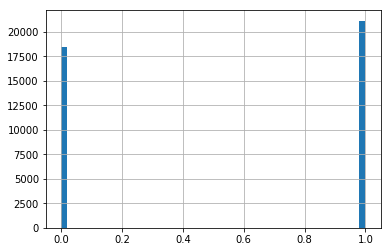

In [65]:
new_data2["labels"].hist(bins=50);

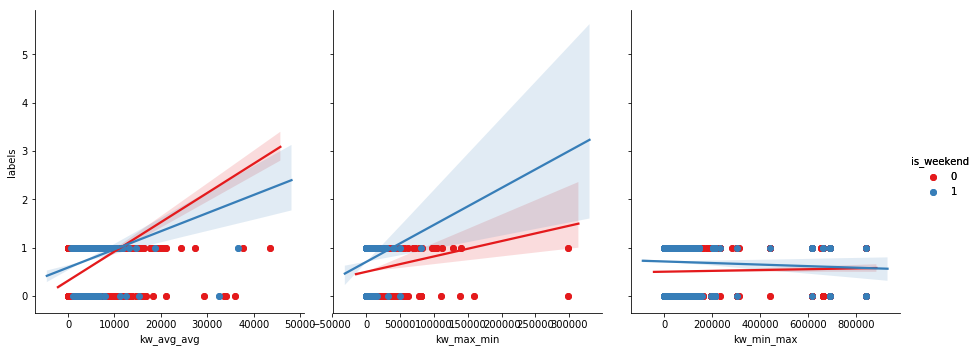

In [66]:
g = sns.pairplot(new_data2, x_vars=["kw_avg_avg", "kw_max_min", "kw_min_max"],
                 y_vars=["labels"], hue= "is_weekend", palette="Set1", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

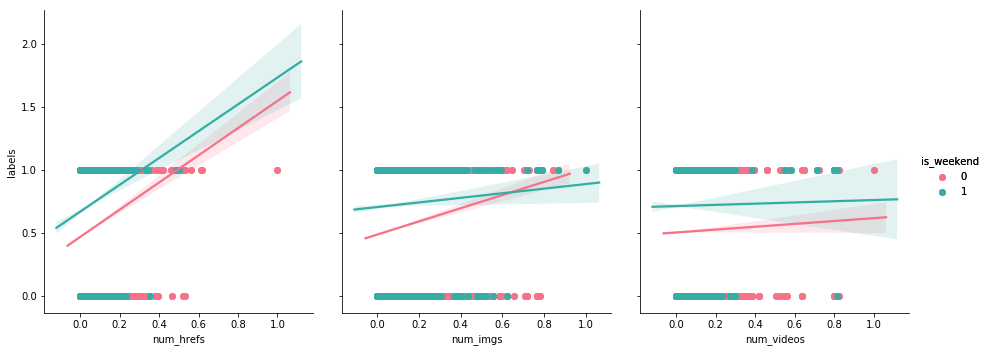

In [67]:
g = sns.pairplot(new_data2, x_vars=["num_hrefs", "num_imgs", "num_videos"],
                 y_vars=["labels"],hue= "is_weekend", palette="husl", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

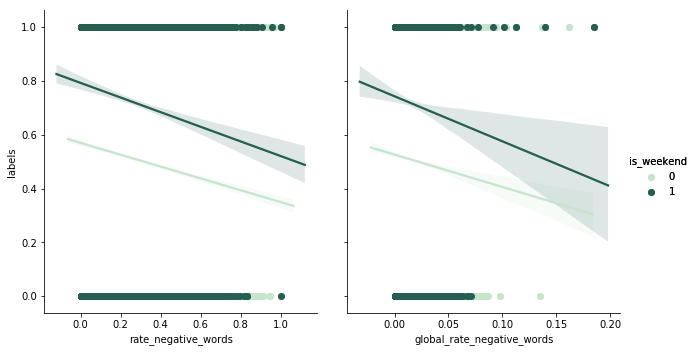

In [68]:
g = sns.pairplot(new_data2, x_vars=["rate_negative_words", "global_rate_negative_words"],
                 y_vars=["labels"], hue= "is_weekend", palette="ch:2.5,-.2,dark=.3", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

### The number of links to the article also have a positive effect on the number of shares, whereas whether the article has been published on weekends might play some role in popularity of an article. The negative words used are also affecting popularity of the articles.

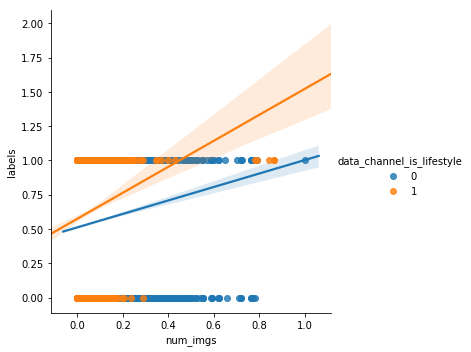

In [69]:
sns.lmplot(x="num_imgs", y="labels", hue="data_channel_is_lifestyle", data=new_data2);

C:\Users\ridhi\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000026CBB4BB5F8> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


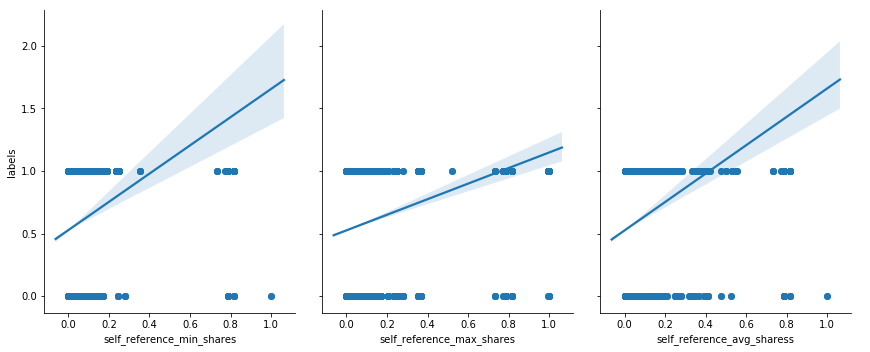

In [70]:
g = sns.pairplot(new_data2, x_vars=["self_reference_min_shares", "self_reference_max_shares", "self_reference_avg_sharess"],
                 y_vars=["labels"], palette="Blues_d", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

C:\Users\ridhi\Anaconda3\lib\site-packages\matplotlib\legend.py:449: UserWarning: The handle <matplotlib.patches.Patch object at 0x0000026CBB709E10> has a label of '_nolegend_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))


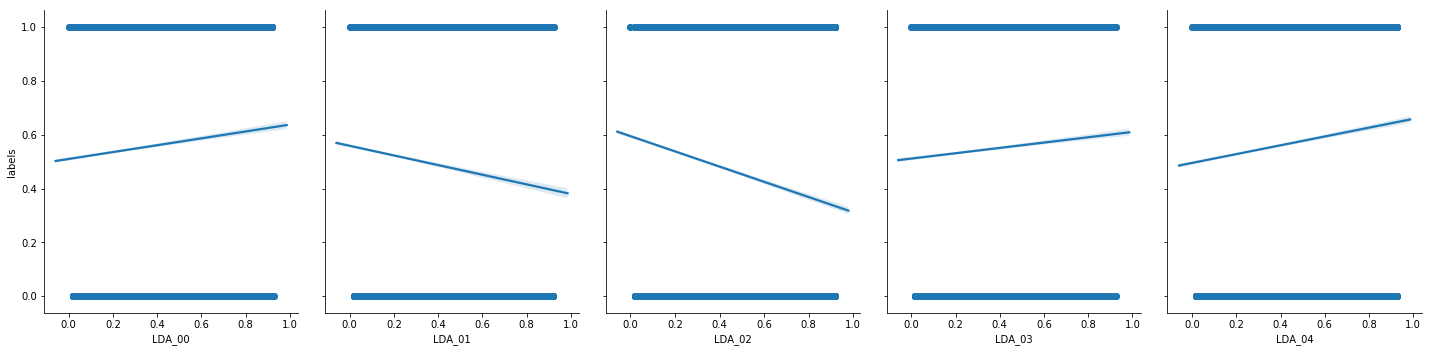

In [71]:
g = sns.pairplot(new_data2, x_vars=["LDA_00", "LDA_01", "LDA_02", "LDA_03", "LDA_04"],
                 y_vars=["labels"], palette="Set1", height=5, aspect=.8, kind="reg")
g = g.map(plt.scatter)
g = g.add_legend()

### The closeness to a previous topic (computed using LDA) also plays a significant role in popularity of article. This makes sense in this labelled data

In [72]:
# Feature selection by RFECV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [73]:
new_data2.keys()

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_positive_polarity',
       'min_pos

In [74]:
label = new_data2["labels"]
features =  new_data2.drop(new_data2.keys()[-1], axis=1)

### I have used the recurcive elimination and feature selection for logistic and random forest 

### Logistic

In [75]:
estimator = LogisticRegression(random_state=0)
selector = RFECV(estimator, step=4, cv=5)

In [76]:
selector = selector.fit(features, label)

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [77]:
selector.ranking_

array([1, 1, 1, 1, 8, 5, 8, 6, 8, 1, 7, 6, 1, 1, 1, 1, 1, 3, 4, 4, 9, 5,
       5, 4, 4, 3, 8, 1, 7, 1, 1, 1, 1, 7, 1, 1, 1, 1, 2, 1, 1, 2, 6, 1,
       9, 9, 7, 1, 1, 1, 5, 3, 2, 2, 9, 1, 3, 6])

In [78]:
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
features_LR = features[features.columns.values[selector.ranking_==1]]
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(features_LR, label, test_size = 0.1, random_state = 42)
clf_B = LogisticRegression(random_state=42)
clf_B.fit(X_train_LR, y_train_LR)
from sklearn.metrics import accuracy_score
y_pred = clf_B.predict(X_test_LR)
accuracy_score(y_test_LR, y_pred)

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6418663303909206

[[1041  845]
 [ 575 1504]]
Accuracy: 0.6418663303909206


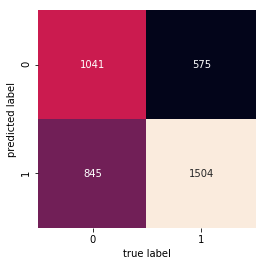

In [79]:
mat = confusion_matrix(y_test_LR, y_pred)
print(confusion_matrix(y_test_LR, y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test_LR, y_pred))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Random Forest

In [80]:
estimator_RF = RandomForestClassifier(random_state=0)
selector_RF = RFECV(estimator_RF, step=1, cv=5)
selector_RF = selector_RF.fit(features, label)
selector_RF.ranking_

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: F

array([ 1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  9,  1,  7,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  6,  2,  3,  4,  5,
        1,  8,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1])

In [81]:
clf_C = RandomForestClassifier(random_state=0)
features_RF = features[features.columns.values[selector_RF.ranking_==1]]
X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, label, test_size = 0.3, random_state = 0)
clf_C.fit(X_train_RF, y_train_RF)
from sklearn.metrics import accuracy_score
y_pred = clf_C.predict(X_test_RF)
accuracy_score(y_test_RF, y_pred)

C:\Users\ridhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.623675802925845

[[3674 1911]
 [2565 3744]]
Accuracy: 0.623675802925845


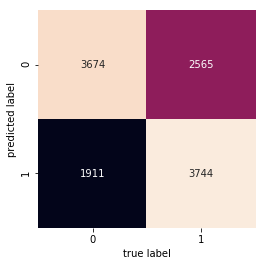

In [82]:
mat = confusion_matrix(y_test_RF, y_pred)
print(confusion_matrix(y_test_RF, y_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test_RF, y_pred))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

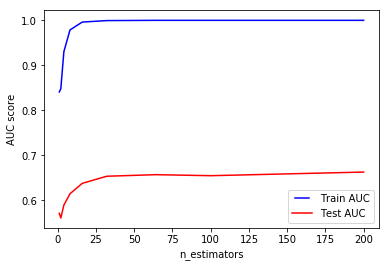

In [83]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
   rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
   rf.fit(X_train_RF, y_train_RF)
   train_pred = rf.predict(X_train_RF)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_RF, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = rf.predict(X_test_RF)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test_RF, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

[[3306 2279]
 [1949 4360]]
Accuracy: 0.6445266520934925


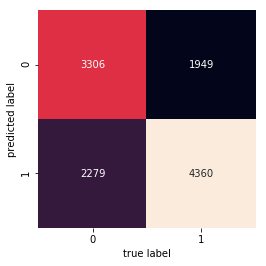

In [84]:
from sklearn.metrics import confusion_matrix
clf11=RandomForestClassifier(n_estimators=25)
model3 = clf11.fit(X_train_RF, y_train_RF)
y_pred1=clf11.predict(X_test_RF)
from sklearn import metrics
mat = confusion_matrix(y_test_RF, y_pred1)
print(confusion_matrix(y_test_RF, y_pred1)) 
print("Accuracy:",metrics.accuracy_score(y_test_RF, y_pred1))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### KNN Classifier

In [85]:
X_train, X_test, y_train, y_test = train_test_split(features, label,test_size = 0.1, random_state=41)

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5715006305170239

In [87]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = [x for x in myList if x % 2 != 0]

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

43


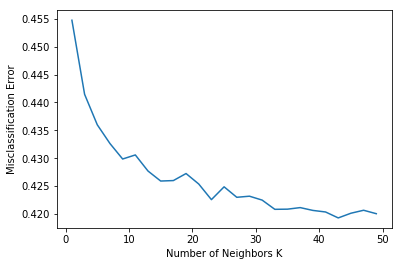

In [88]:
MSE = [1 - x for x in cv_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print (optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


In [89]:
knn_1 = KNeighborsClassifier(n_neighbors=43)
knn_1.fit(X_train, y_train)
knn_1.score(X_test, y_test)

0.5717528373266079

[[ 886  972]
 [ 726 1381]]


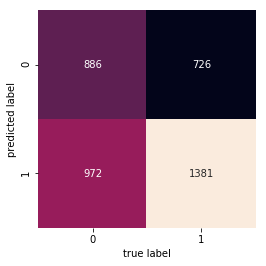

In [90]:
knn_pred = knn_1.predict(X_test)
mat = confusion_matrix(y_test, knn_pred)
print(confusion_matrix(y_test, knn_pred))  
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
cls = GaussianNB()
model1 = cls.fit(X_train, y_train)

[[1653  205]
 [1660  447]]


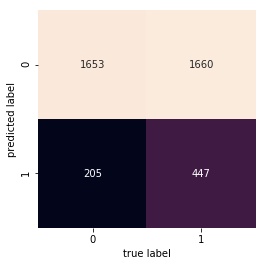

In [92]:
predicted = model1.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predicted))  
mat = confusion_matrix(y_test, predicted)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [93]:
model1.score(X_test, y_test)

0.5296343001261034

### Classification Trees

In [94]:
from sklearn import tree
model_tree = tree.DecisionTreeClassifier()
#X_train_RF, X_test_RF, y_train_RF, y_test_RF 
model_tree.fit(X_train_RF,y_train_RF)

model_pred=model_tree.predict(X_test_RF)

In [95]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_RF,model_pred)

0.5755843282327224

[[3022 2563]
 [2485 3824]]
Accuracy: 0.5755843282327224


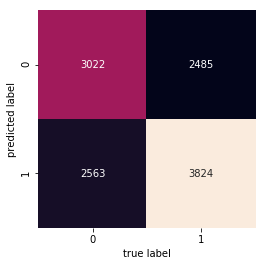

In [96]:
mat = confusion_matrix(y_test_RF, model_pred)
print(confusion_matrix(y_test_RF, model_pred)) 
print("Accuracy:",metrics.accuracy_score(y_test_RF, model_pred))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

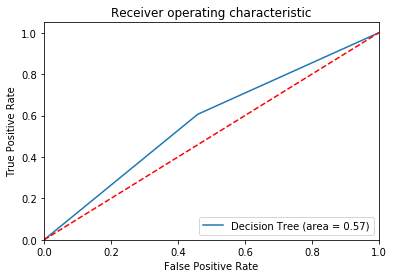

In [97]:
#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logmodel_roc_auc = roc_auc_score(y_test_RF,model_pred)
fpr, tpr, thresholds = roc_curve(y_test_RF, model_tree.predict_proba(X_test_RF)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logmodel_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Amongst our algorithms Random Forest has the maximum accuracy on using 25 estimators. If we want to consider increasing our sensitivity, we can choose Logistic or KNN model else if our focus is on having higher specificity, we can choose Naïve Bayes model. 